2*2 MATRIX QPCA

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

def create_qpca_circuit_2x2():
    num_qubits = 2
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)
    
    qc.h(0)
    qc.h(1)
    
    qc.cp(1.5708, 0, num_qubits)
    qc.cp(0.7854, 1, num_qubits)
    
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc

simulator = AerSimulator()
circuit_2x2 = create_qpca_circuit_2x2()
compiled_circuit = transpile(circuit_2x2, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()




Measurement Outcomes: {'00': 533, '10': 479, '01': 6, '11': 6}


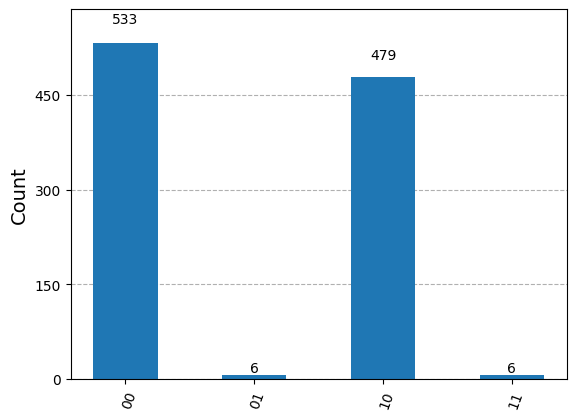

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator  # Fixed import

def create_qpca_circuit_2x2():
    num_qubits = 2
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)

    # Define the sample 2x2 density matrix
    rho = np.array([[0.6, 0.4], [0.4, 0.4]])

    # Compute the eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(rho)

    # Take the eigenvector corresponding to the largest eigenvalue
    dominant_eigenvector = eigvecs[:, -1]

    # Extend to 2-qubit state vector (tensor product with |0>)
    full_init_state = np.kron(dominant_eigenvector, [1, 0])

    # Convert to a quantum state and initialize the system
    init_sv = Statevector(full_init_state)
    qc.initialize(init_sv, [0, 1])

    # Apply CP gates to encode eigenvalues
    qc.cp(np.pi/2, 0, num_qubits)  # π/2 phase shift
    qc.cp(np.pi/4, 1, num_qubits)  # π/4 phase shift

    # Apply inverse Quantum Fourier Transform (QFT†)
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

    # Measurement
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

# Run the circuit
simulator = AerSimulator()
circuit_2x2 = create_qpca_circuit_2x2()
compiled_circuit = transpile(circuit_2x2, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Print measurement results
counts = result.get_counts()
print("Measurement Outcomes:", counts)
plot_histogram(counts)


In [2]:
print(circuit_2x2.draw())

     ┌────────────────────────────────────┐                  ┌───────┐┌─┐   
q_0: ┤0                                   ├─■────────────────┤0      ├┤M├───
     │  Initialize(-0.78821,0,-0.61541,0) │ │                │  IQFT │└╥┘┌─┐
q_1: ┤1                                   ├─┼────────■───────┤1      ├─╫─┤M├
     └────────────────────────────────────┘ │P(π/2)  │P(π/4) └───────┘ ║ └╥┘
q_2: ───────────────────────────────────────■────────■─────────────────╫──╫─
                                                                       ║  ║ 
c: 2/══════════════════════════════════════════════════════════════════╩══╩═
                                                                       0  1 


Measurement Counts: {'00': 533, '10': 479, '01': 6, '11': 6}


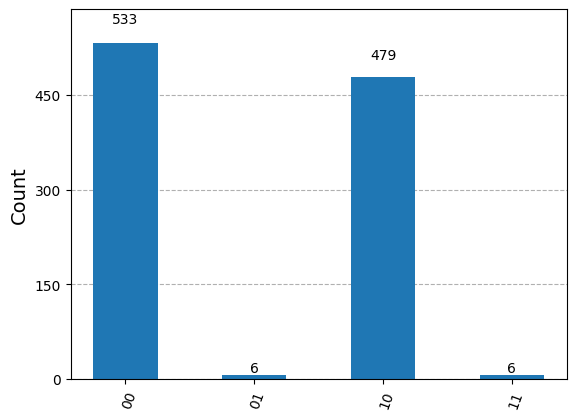

In [3]:
counts = result.get_counts()
print("Measurement Counts:", counts)
plot_histogram(counts)

4*4 MATRIX QPCA

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

def create_qpca_circuit_4x4():
    num_qubits = 4
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    
    qc.cp(1.5708, 0, num_qubits)  # CP(pi/2)
    qc.cp(0.7854, 1, num_qubits)  # CP(pi/4)
    qc.cp(0.3927, 2, num_qubits)  # CP(pi/8)
    qc.cp(0.1963, 3, num_qubits)  # CP(pi/16)

    
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc

simulator = AerSimulator()
circuit_4x4 = create_qpca_circuit_4x4()
compiled_circuit = transpile(circuit_4x4, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()



Measurement Outcomes (4x4): {'1100': 263, '1101': 1, '0100': 252, '1000': 231, '0000': 238, '0111': 5, '1001': 7, '0101': 1, '1111': 3, '0010': 3, '0110': 3, '1010': 7, '0011': 2, '0001': 2, '1011': 5, '1110': 1}


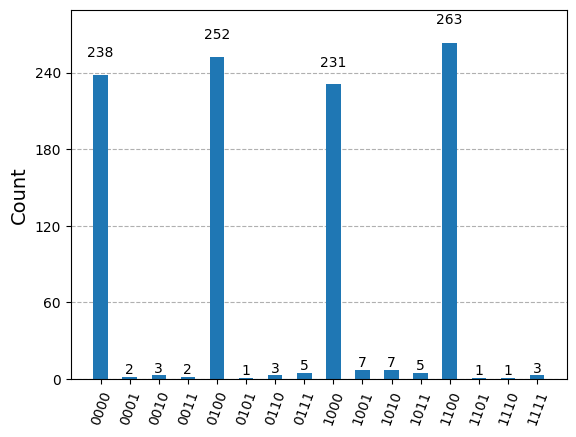

In [5]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

def create_qpca_circuit_4x4():
    num_qubits = 4  # For 4x4 matrix, we need 4 qubits
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)

    # Define a sample 4x4 density matrix
    rho = np.array([
        [0.4, 0.2, 0.1, 0.1],
        [0.2, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.2],
        [0.1, 0.1, 0.2, 0.6]
    ])

    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(rho)

    # Take the eigenvector corresponding to the largest eigenvalue
    dominant_eigenvector = eigvecs[:, -1]

    # Normalize the eigenvector
    dominant_eigenvector /= np.linalg.norm(dominant_eigenvector)

    # Extend to match the required statevector size (2^num_qubits = 16 elements)
    full_init_state = np.kron(dominant_eigenvector, [1, 0])  # Extending to 8 elements
    full_init_state = np.kron(full_init_state, [1, 0])  # Extending to 16 elements

    # Convert to a valid quantum state
    init_sv = Statevector(full_init_state)

    # Initialize the system
    qc.initialize(init_sv, range(num_qubits))

    # Apply CP gates to encode eigenvalues
    for i in range(num_qubits):
        qc.cp(np.pi / (2 ** (i + 1)), i, num_qubits)

    # Apply inverse QFT
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

    # Measurement
    qc.measure(range(num_qubits), range(num_qubits))

    return qc


# Run the circuit
simulator = AerSimulator()
circuit_4x4 = create_qpca_circuit_4x4()
compiled_circuit = transpile(circuit_4x4, simulator)

result = simulator.run(compiled_circuit, shots=1024).result()

# Print results
counts = result.get_counts()
print("Measurement Outcomes (4x4):", counts)
plot_histogram(counts)


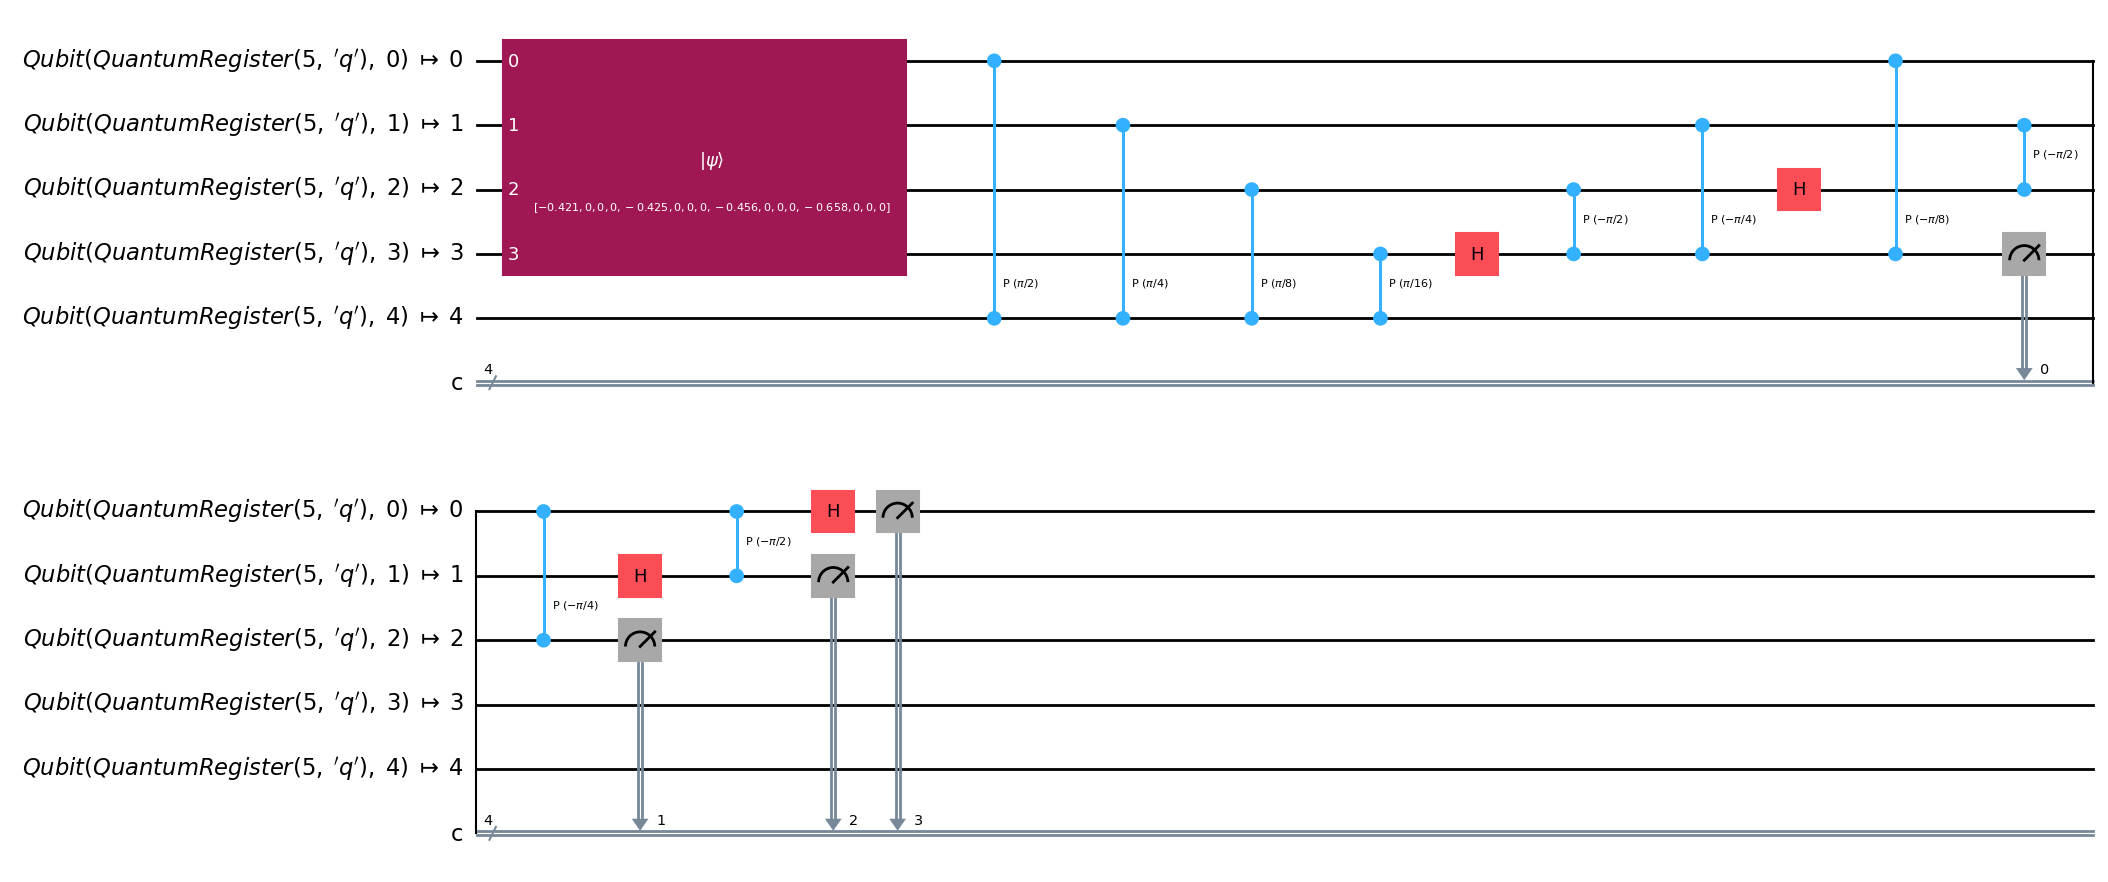

In [6]:
compiled_circuit.draw('mpl')

In [7]:
def create_qpca_circuit_4x4():
    num_qubits = 4
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)

    # Initial Hadamard gates
    for i in range(num_qubits):
        qc.h(i)

    # CP gates based on eigenvalues of the sample 4x4 matrix
    qc.cp(1.5708, 0, num_qubits)  # π/2 (Eigenvalue ~1)
    qc.cp(0.7854, 1, num_qubits)  # π/4 (Eigenvalue ~0.5)
    qc.cp(0.3927, 2, num_qubits)  # π/8 (Eigenvalue ~0.3)
    qc.cp(0.1963, 3, num_qubits)  # π/16 (Eigenvalue ~0.1)

    # Apply inverse Quantum Fourier Transform (QFT†)
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

    # Measurement
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

circuit_4x4 = create_qpca_circuit_4x4()
compiled_circuit = transpile(circuit_4x4, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
print(result.get_counts())  # Print measurement results


{'0000': 1024}


In [8]:
print(circuit_4x4.draw())

     ┌───┐                                                ┌───────┐┌─┐         
q_0: ┤ H ├─■──────────────────────────────────────────────┤0      ├┤M├─────────
     ├───┤ │                                              │       │└╥┘┌─┐      
q_1: ┤ H ├─┼───────────■──────────────────────────────────┤1      ├─╫─┤M├──────
     ├───┤ │           │                                  │  IQFT │ ║ └╥┘┌─┐   
q_2: ┤ H ├─┼───────────┼───────────■──────────────────────┤2      ├─╫──╫─┤M├───
     ├───┤ │           │           │                      │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─┼───────────┼───────────┼───────────■──────────┤3      ├─╫──╫──╫─┤M├
     └───┘ │P(1.5708)  │P(0.7854)  │P(0.3927)  │P(0.1963) └───────┘ ║  ║  ║ └╥┘
q_4: ──────■───────────■───────────■───────────■────────────────────╫──╫──╫──╫─
                                                                    ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                        

Measurement Counts: {'0000': 1024}


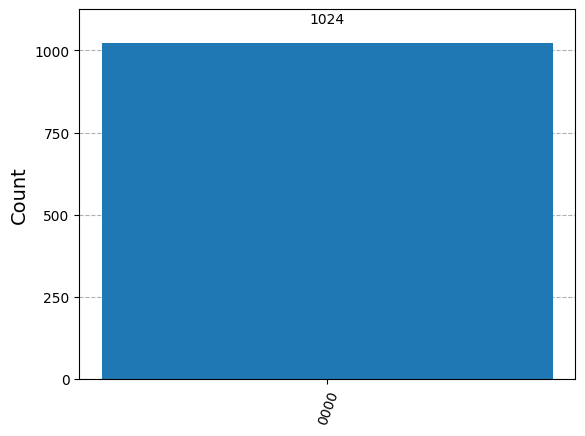

In [9]:
counts = result.get_counts()
print("Measurement Counts:", counts)
plot_histogram(counts)

8*8 MATRIX QPCA

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

def create_qpca_circuit_8x8():
    num_qubits = 8
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    qc.h(4)
    qc.h(5)
    qc.h(6)
    qc.h(7)
    
    qc.cp(1.5708, 0, num_qubits)  # CP(pi/2)
    qc.cp(0.7854, 1, num_qubits)  # CP(pi/4)
    qc.cp(0.3927, 2, num_qubits)  # CP(pi/8)
    qc.cp(0.1963, 3, num_qubits)  # CP(pi/16)
    qc.cp(0.0981, 4, num_qubits)  # CP(pi/32)
    qc.cp(0.0490, 5, num_qubits)  # CP(pi/64)
    qc.cp(0.0245, 6, num_qubits)  # CP(pi/128)
    qc.cp(0.0122, 7, num_qubits)  # CP(pi/256)

    
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc

simulator = AerSimulator()
circuit_8x8 = create_qpca_circuit_8x8()
compiled_circuit = transpile(circuit_8x8, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()



Measurement Outcomes (8x8): {'11000000': 29, '10011001': 1, '00101000': 23, '11010110': 2, '00100000': 31, '10111000': 29, '10110000': 26, '01111100': 1, '10011010': 1, '00000000': 26, '01010000': 32, '10111110': 1, '11110000': 22, '00110001': 1, '11100011': 1, '01000000': 26, '11000010': 1, '10010100': 2, '00001000': 29, '10100000': 49, '10011000': 21, '11111000': 33, '10001111': 1, '11011000': 34, '10101000': 35, '11010000': 42, '01111000': 30, '01011000': 31, '00101110': 1, '11100000': 34, '10000000': 37, '11001000': 38, '00010000': 32, '00110000': 32, '10001100': 1, '00011000': 29, '10001000': 36, '00011110': 1, '01100000': 29, '10110100': 1, '10000110': 2, '01101000': 35, '11101000': 31, '11000100': 1, '01110000': 21, '01001110': 1, '11010100': 1, '11000110': 3, '10010000': 27, '10100110': 1, '00111000': 28, '10111111': 1, '01001000': 26, '10110111': 1, '11001110': 1, '00000010': 2, '10101110': 1, '11001100': 1, '01010110': 1, '01101001': 1, '10000111': 1, '01100010': 1, '11110010

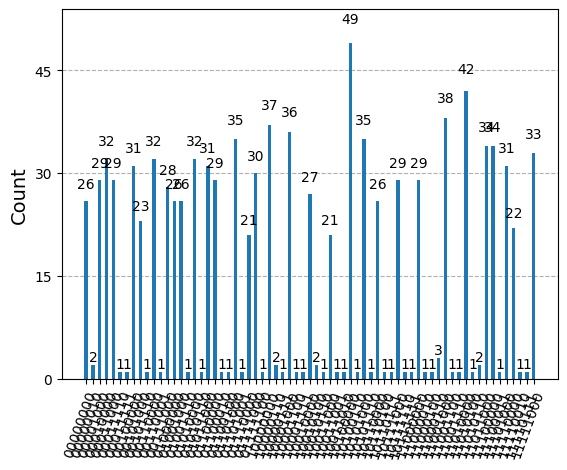

In [11]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

def create_qpca_circuit_8x8():
    num_qubits = 8  # For 8x8 matrix, we need 8 qubits
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)

    # Define a sample 8x8 density matrix
    rho = np.array([
        [0.2, 0.1, 0.05, 0.05, 0.02, 0.02, 0.01, 0.01],
        [0.1, 0.2, 0.1, 0.05, 0.02, 0.02, 0.01, 0.01],
        [0.05, 0.1, 0.2, 0.1, 0.05, 0.02, 0.02, 0.01],
        [0.05, 0.05, 0.1, 0.3, 0.1, 0.05, 0.02, 0.02],
        [0.02, 0.02, 0.05, 0.1, 0.2, 0.1, 0.05, 0.02],
        [0.02, 0.02, 0.02, 0.05, 0.1, 0.2, 0.1, 0.05],
        [0.01, 0.01, 0.02, 0.02, 0.05, 0.1, 0.2, 0.1],
        [0.01, 0.01, 0.01, 0.02, 0.02, 0.05, 0.1, 0.4]
    ])

    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(rho)

    # Take the eigenvector corresponding to the largest eigenvalue
    dominant_eigenvector = eigvecs[:, -1]

    # Normalize the eigenvector
    dominant_eigenvector /= np.linalg.norm(dominant_eigenvector)

    # Extend to match the required statevector size (2^num_qubits = 256 elements)
    full_init_state = dominant_eigenvector
    for _ in range(8 - int(np.log2(len(dominant_eigenvector)))):
        full_init_state = np.kron(full_init_state, [1, 0])

    # Convert to a valid quantum state
    init_sv = Statevector(full_init_state)

    # Initialize the system
    qc.initialize(init_sv, range(num_qubits))

    # Apply CP gates to encode eigenvalues
    for i in range(num_qubits):
        qc.cp(np.pi / (2 ** (i + 1)), i, num_qubits)

    # Apply inverse QFT
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

    # Measurement
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

# Run the circuit
simulator = AerSimulator()
circuit_8x8 = create_qpca_circuit_8x8()
compiled_circuit = transpile(circuit_8x8, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Print results
counts = result.get_counts()
print("Measurement Outcomes (8x8):", counts)
plot_histogram(counts)


In [12]:
print(circuit_8x8.draw())

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
q_8: »
     »
c: 8/»
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                                                                                                                                              

Measurement Counts: {'11000000': 29, '10011001': 1, '00101000': 23, '11010110': 2, '00100000': 31, '10111000': 29, '10110000': 26, '01111100': 1, '10011010': 1, '00000000': 26, '01010000': 32, '10111110': 1, '11110000': 22, '00110001': 1, '11100011': 1, '01000000': 26, '11000010': 1, '10010100': 2, '00001000': 29, '10100000': 49, '10011000': 21, '11111000': 33, '10001111': 1, '11011000': 34, '10101000': 35, '11010000': 42, '01111000': 30, '01011000': 31, '00101110': 1, '11100000': 34, '10000000': 37, '11001000': 38, '00010000': 32, '00110000': 32, '10001100': 1, '00011000': 29, '10001000': 36, '00011110': 1, '01100000': 29, '10110100': 1, '10000110': 2, '01101000': 35, '11101000': 31, '11000100': 1, '01110000': 21, '01001110': 1, '11010100': 1, '11000110': 3, '10010000': 27, '10100110': 1, '00111000': 28, '10111111': 1, '01001000': 26, '10110111': 1, '11001110': 1, '00000010': 2, '10101110': 1, '11001100': 1, '01010110': 1, '01101001': 1, '10000111': 1, '01100010': 1, '11110010': 1, '0

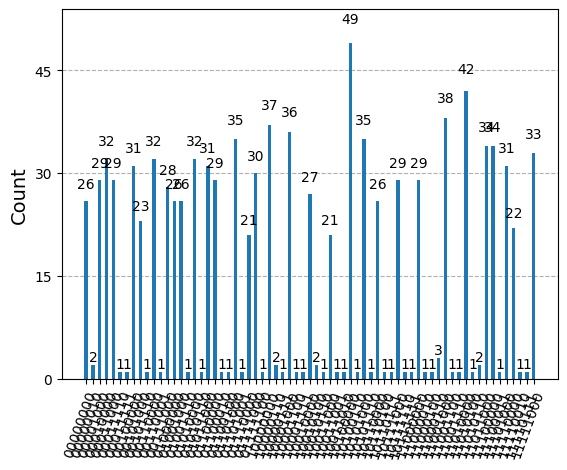

In [13]:
counts = result.get_counts()
print("Measurement Counts:", counts)
plot_histogram(counts)